# Geophysical methods

Author: Mateusz Zareba, PhD
    contact: url="https://pl.linkedin.com/in/mateusz-zareba-13407b121"

Geophysical methods are a set of techniques used to study the Earth's subsurface and its physical properties. These methods utilize various principles of physics to investigate subsurface. Geophysical methods are widely used in various fields, including mineral exploration, environmental assessment, civil engineering, archaeology, and natural hazard prediction. They play a crucial role in understanding the Earth's subsurface and solving complex geologic and environmental challenges. As technology advances, geophysicists continue to develop new methods and refine existing ones, enhancing our ability to explore and understand the Earth's hidden depths.

**Seismic Methods** - Reflection and Refraction methods

**Borehole Geophysics (well-logging)**

**Electrical Methods** - Resistivity and Induced Polarization

**Gravity Methods**

**Magnetometry**

**Ground-Penetrating Radar (GPR)**

**Satellite-based remote sensing techniques** -  LiDAR (Light Detection and Ranging) and InSAR (Interferometric Synthetic Aperture Radar)

**The ray tracing approach**
involves tracing the paths or trajectories of individual wavefronts or rays as they propagate through a medium

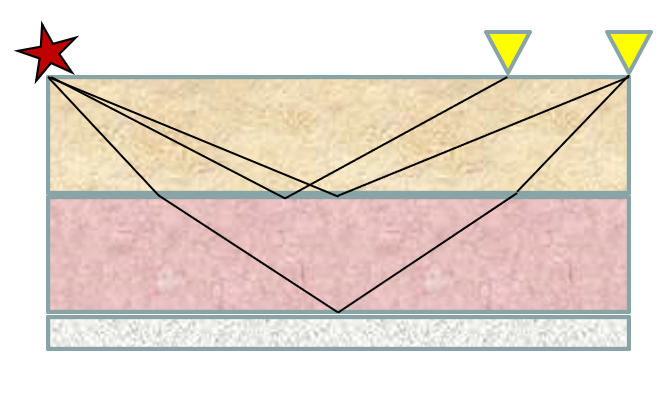

**Wave theory of propagation**
Involves describing the phenomenon of seismic wave propagation in a geological medium using wave equations, for example, the acoustic wave equation relates changes in pressure in space to changes in that pressure over time.
If we know the pressure values at every point in the model at a particular moment in time, we can calculate the pressure values for every point throughout the entire time interval. 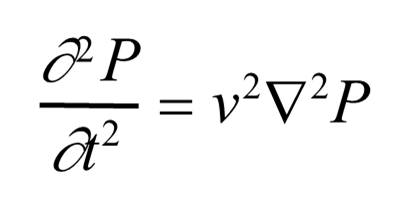
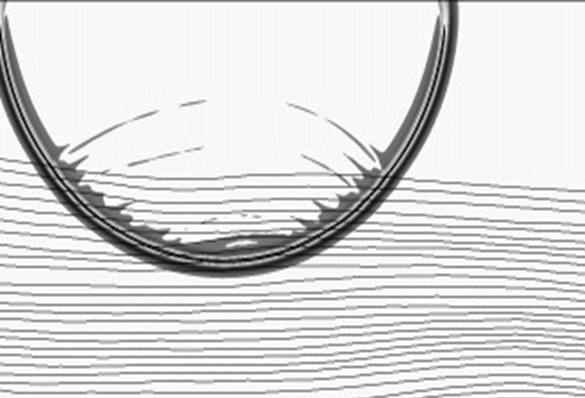

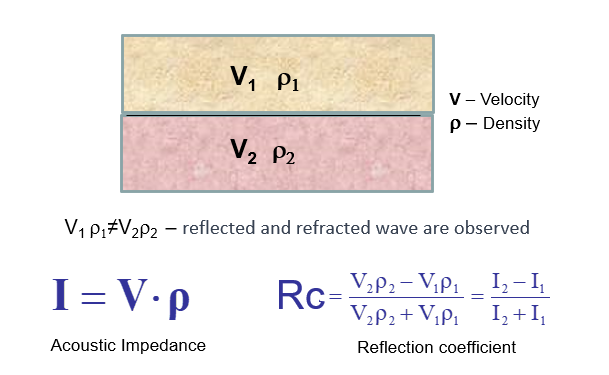

# 2D Seismic

**Source-Receptor Geometry:** In 2D seismic, the source and receiver arrays are typically arranged in a linear fashion along a profile or traverse. The seismic waves propagate outward from the source and are detected by the receivers at different distances and times.

**Data Recording:** The signals recorded by the geophones are digitized and stored as seismic traces. These traces contain information about the amplitude and arrival time of the reflected waves, which can be used to create subsurface images.

### 2D seismic acquisition - simplified 
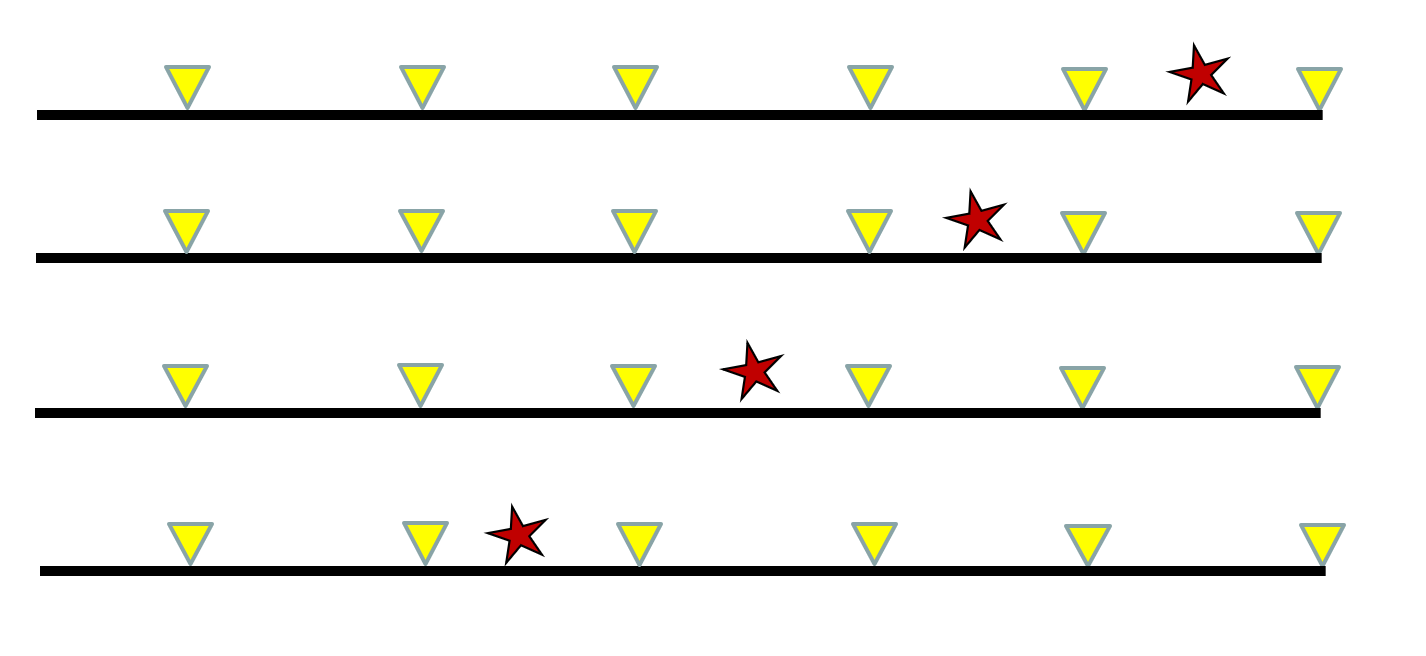

### 2D seismic - Shot gather 
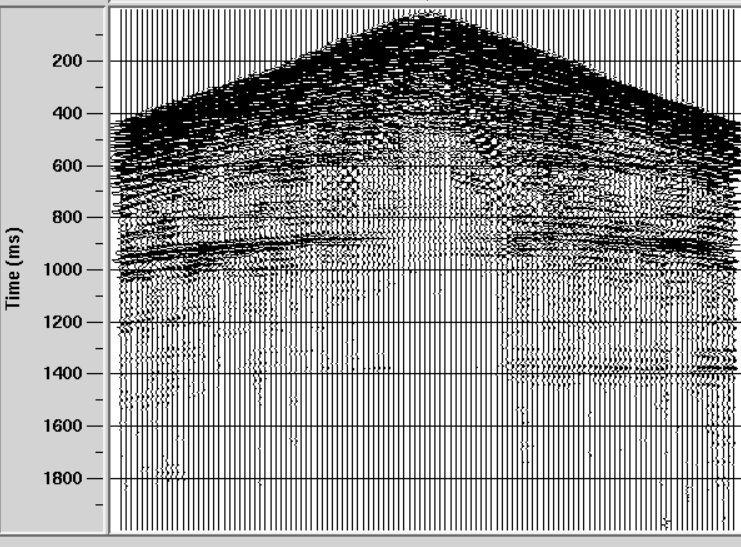

# 3D Seismic

**Geophone Arrays:** In 3D seismic, a dense network of geophones or seismometers is deployed across the survey area, creating a grid of receivers. These receivers record the returning seismic waves, capturing a vast amount of data in both the horizontal and vertical dimensions.

**Spatial Coverage:** Unlike 2D seismic, which captures data along a single linear profile, 3D seismic acquires data in a three-dimensional grid or volume. This comprehensive spatial coverage allows for a detailed characterization of the subsurface.

**Multiple Shot Points:** 3D seismic surveys often involve multiple source points, each generating seismic waves in different directions. This multi-fold data acquisition enhances the quality of subsurface imaging.

### 3D seismic acquisition - simplified 
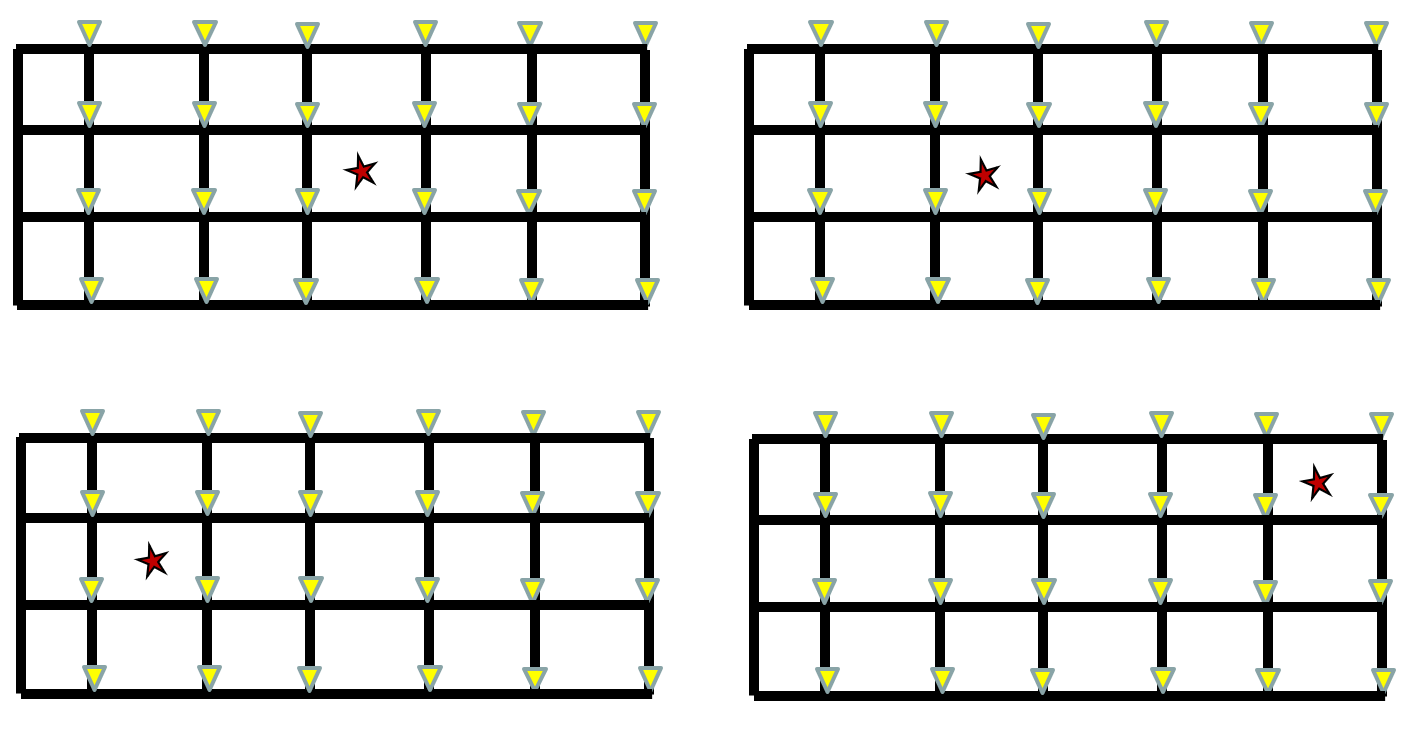

### 3D seismic - pre-stack gather 
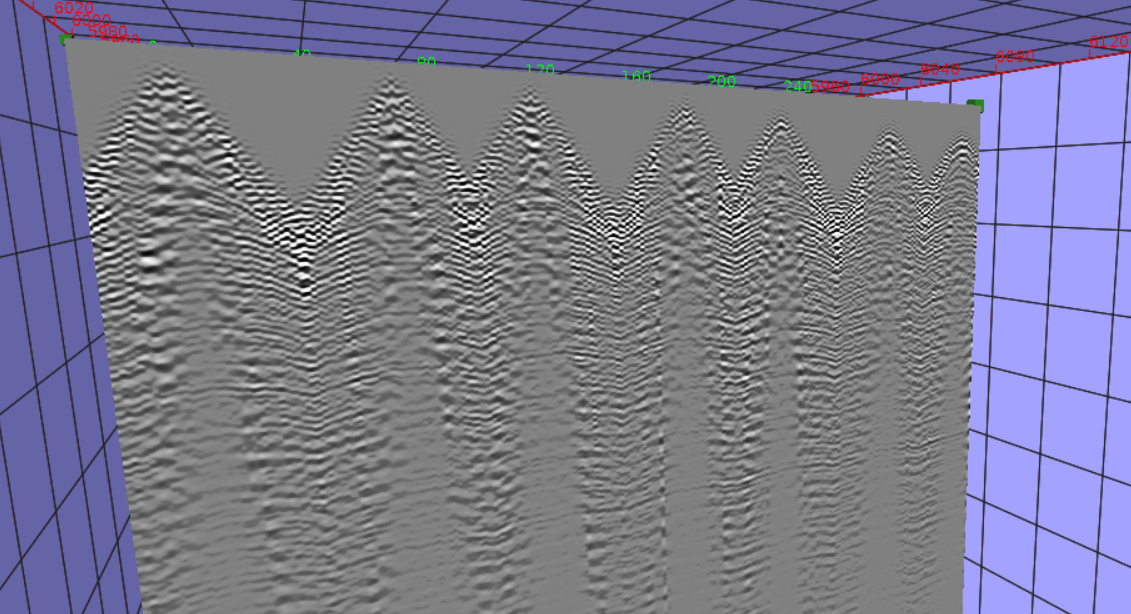

# Typical steps in seismic surveys
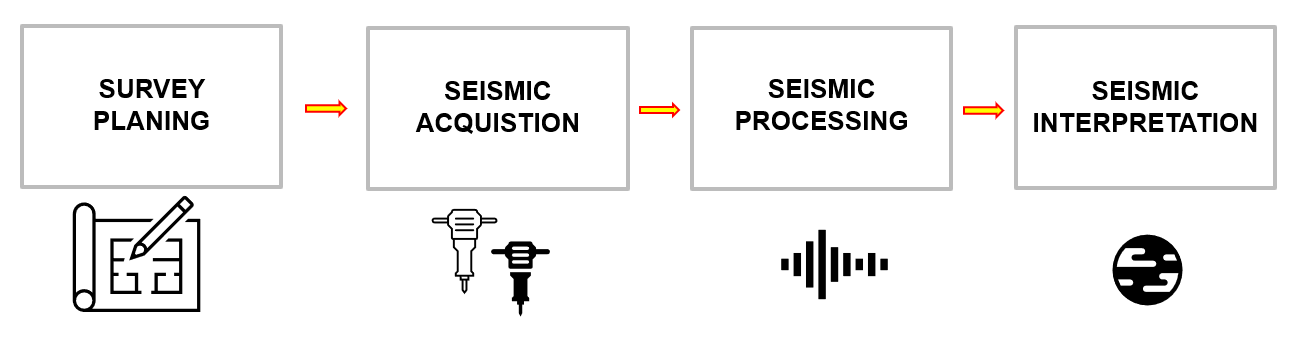

### **Basic Features from Seismic Data**

- **Amplitude Attributes:**
  - *Maximum Amplitude*: Indicates the maximum amplitude within a seismic trace.
  - *Mean Amplitude*: Represents the average amplitude of a seismic trace.
  - *Amplitude Variability*: Highlights variations in amplitude over a specified interval.



- **Frequency Attributes:**
  - *Dominant Frequency*: Reveals the frequency at which the seismic signal has the highest energy.
  - *Spectral Decomposition*: Decomposes the seismic signal into frequency components.



- **Time-Domain Attributes:**
  - *Zero Crossing Rate*: Measures the rate at which the seismic trace crosses zero.
  - *Signal Energy*: Quantifies the energy contained within the seismic trace.



- **Spectral Attributes:**
  - *Spectral Amplitude*: Describes the amplitude of specific frequency components within the seismic signal.
  - *Spectral Phase*: Provides information about the phase of frequency components.


- **Statistical Attributes:**
  - *Mean, Median, Standard Deviation*: Basic statistical measures of seismic trace values within a window or depth interval.
  - *Skewness and Kurtosis*: Indicators of data distribution characteristics.



- **Texture Attributes:**
  - *Entropy*: A measure of randomness or disorder in the seismic trace.
  - *Co-occurrence Matrix Features*: Describe spatial relationships between seismic values.



- **Amp-Freq Decomposition:**
  - *Hilbert-Huang Transform (HHT)*: Decomposes the seismic signal into intrinsic mode functions (IMFs).



- **Phase Attributes:**
  - *Instantaneous Phase*: Determines the phase of the seismic wavelet at each sample point.
  - *Phase Residuals*: Calculates phase differences between seismic traces or depths.



- **Stratigraphic Attributes:**
  - *Reflection Strength*: Characterizes the strength or intensity of reflections from specific horizons.
  - *Lithology Indicator*: Identifies lithological variations based on seismic responses.



- **Seismic Attributes Derived from Machine Learning:**
  - *Principal Component Analysis (PCA)*: Reduces dimensionality and captures key seismic variations.
  - *Waveform Classification*: Uses machine learning classifiers to categorize seismic waveforms.



- **Depth-Related Attributes:**
  - *Time-Depth Conversion*: Converts time-based seismic data to depth coordinates based on velocity models.
  - *Depth Slicing*: Creates attribute volumes at specific depth intervals.



- **Structural Attributes:**
  - *Fault Likelihood*: Predicts the likelihood of fault presence based on seismic discontinuities.
  - *Stratigraphic Dip*: Estimates the dip angle of stratigraphic layers.

# How do we stroe seismic data?

The **SEG-Y** format is a widely used data format in the field of seismic exploration and geophysics. It is designed to store seismic data acquired from subsurface surveys, such as seismic reflection surveys used in oil and gas exploration. The SEG-Y format is a binary format with a specific structure that allows for the storage of seismic traces and associated metadata. Here is an overview of how the SEG-Y format is constructed:

**File Header:**

The SEG-Y file begins with a file header that contains essential information about the data within the file. This header is typically 3,200 bytes in length.
Key information in the file header includes the format revision number, the number of samples per trace, data sample format (e.g., IEEE floating-point), and details about the data recording format.

**Textual Header:**

Following the file header, there is often an optional textual header. This header can contain text-based information such as survey details, acquisition parameters, and processing history.
The textual header consists of 3,600 bytes or more and may vary in size.


**Binary Data:**

The majority of the SEG-Y file consists of the binary seismic data itself. It is organized into individual seismic traces.
Each seismic trace starts with a trace header, which is 240 bytes long and contains metadata related to that specific trace. The trace header includes information such as trace number, source-receiver offsets, and more.
The trace header is followed by the actual seismic data samples. The number of samples per trace is specified in the file header. These samples are typically stored as either 32-bit floating-point values or 16-bit signed integers, depending on the chosen data format.

Detailed format description: https://library.seg.org/pb-assets/technical-standards/seg_y_rev2_0-mar2017-1686080998003.pdf

# Importing 2D SEG-Y lines

There are a few different dedicated libraries for importing SEG-Y. 
We will present a sample workflow using **SEGY-SAK** and **SEGYIO**

#### Scanning SEG-Y header

In [81]:
import pathlib
import xarray as xr
import netCDF4
import numpy as np
import pandas as pd
 import matplotlib.pyplot as plt

In [83]:
path = 'BPN88-09A'

In [ ]:
segy_header_scan, get_segy_texthead, segy_header_scrape, well_known_byte_locs, segy_loader, segy_writer

In [84]:
from segysak.segy import get_segy_texthead

get_segy_texthead(path)

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2020.5 Friday, February 25 2022 11:20:19
C 2 Name: BPN88-09A ÝRealized¨ 1 Type: 2D seismic
C 3
C 4 First CDP: 1993.000000 Last CDP: 7638.000000
C 5 First SP:  1128312832.000000 Last SP:  1139873792.000000
C 6 CRS: ST_ED50_UTM31N_P23031_T1133 ÝStatoil,2100005¨
C 7 X min: 500077.00 max: 565460.00 delta: 65383.00
C 8 Y min: 6676640.00 max: 6713804.00 delta: 37164.00
C 9 Time min: -6985.00 max: 27.00 delta: 7012.00
C10 Lat min: 60.13'11.5199"N max: 60.33'31.6700"N delta: 0.20'20.1500"
C11 Long min: 3.00'5.0035"E max: 4.11'36.8343"E delta: 1.11'31.8308"
C12 Trace min: -6983.00 max: 25.00 delta: 7008.00
C13 Seismic (template) min: -49416.85 max: 49030.78 delta: 98447.63
C14 Amplitude (data) min: -49416.85 max: 49030.78 delta: 98447.63
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 SP Number                   : bytes 17-20
C26 CDP number                  : bytes 21-24
C27 Coordinate scale factor     : bytes 71-72
C28 X coordinate                : bytes 73-76
C29 Y coordinate                : bytes 77-80
C30 Trace start time/depth      : bytes 109-110
C31 Number of samples per trace : bytes 115-116
C32 Sample interval             : bytes 117-118
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

### Headers QC

In [86]:
scrape = segy_header_scrape('BPN88-09A')
scrape

100%|██████████| 5.65k/5.65k [00:00<00:00, 19.2k traces/s]


TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
0                       1                    1            1            1   
1                       2                    1            1            2   
2                       3                    1            1            3   
3                       4                    1            1            4   
4                       5                    1            1            5   
...                   ...                  ...          ...          ...   
5641                 5642                    1            1         5642   
5642                 5643                    1            1         5643   
5643                 5644                    1            1         5644   
5644                 5645                    1            1         5645   
5645                 5646                    1            1         5646   

      EnergySourcePoint   CDP  CDP_TRACE  TraceIdentificationCode  \
0            1128312832  1993          1                        1   
1            1128314880  1994          1                        1   
2            1128316928  1995          1                        1   
3            1128318976  1996          1                        1   
4            1128321024  1997          1                        1   
...                 ...   ...        ...                      ...   
5641         1139865600  7634          1                        1   
5642         1139867648  7635          1                        1   
5643         1139869696  7636          1                        1   
5644         1139871744  7637          1                        1   
5645         1139873792  7638          1                        1   

      NSummedTraces  NStackedTraces  ...  TransductionConstantPower  \
0                 0               0  ...                          0   
1                 0               0  ...                          0   
2                 0               0  ...                          0   
3                 0               0  ...                          0   
4                 0               0  ...                          0   
...             ...             ...  ...                        ...   
5641              0               0  ...                          0   
5642              0               0  ...                          0   
5643              0               0  ...                          0   
5644              0               0  ...                          0   
5645              0               0  ...                          0   

      TransductionUnit  TraceIdentifier  ScalarTraceHeader  SourceType  \
0                    0                0                  0           0   
1                    0                0                  0           0   
2                    0                0                  0           0   
3                    0                0                  0           0   
4                    0                0                  0           0   
...                ...              ...                ...         ...   
5641                 0                0                  0           0   
5642                 0                0                  0           0   
5643                 0                0                  0           0   
5644                 0                0                  0           0   
5645                 0                0                  0           0   

      SourceEnergyDirectionMantissa  SourceEnergyDirectionExponent  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
5641                            

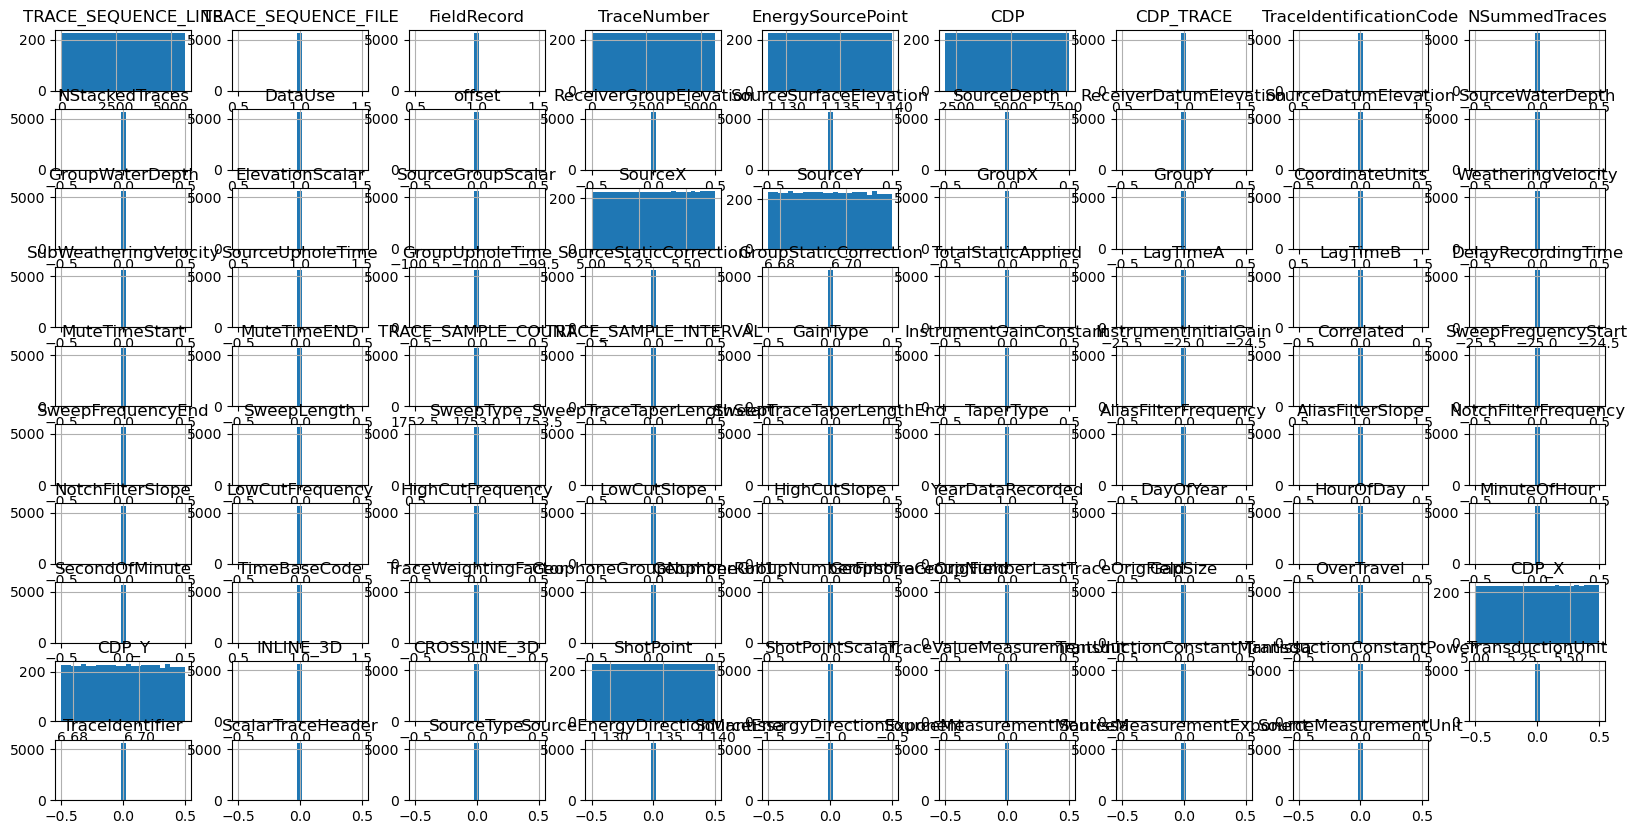

In [87]:
plot = scrape.hist(bins=25, figsize=(20, 10))

In [88]:
scan = segy_header_scan(path)
scan

100%|██████████| 1.00k/1.00k [00:00<00:00, 21.6k traces/s]


byte_loc   count          mean            std  \
TRACE_SEQUENCE_LINE                   1  1000.0  5.005000e+02     288.819436   
TRACE_SEQUENCE_FILE                   5  1000.0  1.000000e+00       0.000000   
FieldRecord                           9  1000.0  1.000000e+00       0.000000   
TraceNumber                          13  1000.0  5.005000e+02     288.819436   
EnergySourcePoint                    17  1000.0  1.129336e+09  591502.205124   
...                                 ...     ...           ...            ...   
SourceEnergyDirectionMantissa       219  1000.0  0.000000e+00       0.000000   
SourceEnergyDirectionExponent       223  1000.0  0.000000e+00       0.000000   
SourceMeasurementMantissa           225  1000.0  0.000000e+00       0.000000   
SourceMeasurementExponent           229  1000.0  0.000000e+00       0.000000   
SourceMeasurementUnit               231  1000.0  0.000000e+00       0.000000   

                                        min           25%           50%  \
TRACE_SEQUENCE_LINE            1.000000e+00  2.507500e+02  5.005000e+02   
TRACE_SEQUENCE_FILE            1.000000e+00  1.000000e+00  1.000000e+00   
FieldRecord                    1.000000e+00  1.000000e+00  1.000000e+00   
TraceNumber                    1.000000e+00  2.507500e+02  5.005000e+02   
EnergySourcePoint              1.128313e+09  1.128824e+09  1.129336e+09   
...                                     ...           ...           ...   
SourceEnergyDirectionMantissa  0.000000e+00  0.000000e+00  0.000000e+00   
SourceEnergyDirectionExponent  0.000000e+00  0.000000e+00  0.000000e+00   
SourceMeasurementMantissa      0.000000e+00  0.000000e+00  0.000000e+00   
SourceMeasurementExponent      0.000000e+00  0.000000e+00  0.000000e+00   
SourceMeasurementUnit          0.000000e+00  0.000000e+00  0.000000e+00   

                                        75%           max  
TRACE_SEQUENCE_LINE            7.502500e+02  1.000000e+03  
TRACE_SEQUENCE_FILE            1.000000e+00  1.000000e+00  
FieldRecord                    1.000000e+00  1.000000e+00  
TraceNumber                    7.502500e+02  1.000000e+03  
EnergySourcePoint              1.129847e+09  1.130359e+09  
...                                     ...           ...  
SourceEnergyDirectionMantissa  0.000000e+00  0.000000e+00  
SourceEnergyDirectionExponent  0.000000e+00  0.000000e+00  
SourceMeasurementMantissa      0.000000e+00  0.000000e+00  
SourceMeasurementExponent      0.000000e+00  0.000000e+00  
SourceMeasurementUnit          0.000000e+00  0.000000e+00  

[89 rows x 9 columns]

In [89]:
scan[scan["std"] > 0]

byte_loc   count          mean            std  \
TRACE_SEQUENCE_LINE         1  1000.0  5.005000e+02     288.819436   
TraceNumber                13  1000.0  5.005000e+02     288.819436   
EnergySourcePoint          17  1000.0  1.129336e+09  591502.205124   
CDP                        21  1000.0  2.492500e+03     288.819436   
SourceX                    73  1000.0  5.058725e+07  335293.970334   
SourceY                    77  1000.0  6.679914e+08  189416.050149   
CDP_X                     181  1000.0  5.058725e+07  335293.970334   
CDP_Y                     185  1000.0  6.679914e+08  189416.050149   
ShotPoint                 197  1000.0  1.129336e+09  591502.205124   

                              min           25%           50%           75%  \
TRACE_SEQUENCE_LINE  1.000000e+00  2.507500e+02  5.005000e+02  7.502500e+02   
TraceNumber          1.000000e+00  2.507500e+02  5.005000e+02  7.502500e+02   
EnergySourcePoint    1.128313e+09  1.128824e+09  1.129336e+09  1.129847e+09   
CDP                  1.993000e+03  2.242750e+03  2.492500e+03  2.742250e+03   
SourceX              5.000770e+07  5.029725e+07  5.058911e+07  5.087849e+07   
SourceY              6.676640e+08  6.678266e+08  6.679885e+08  6.681537e+08   
CDP_X                5.000770e+07  5.029725e+07  5.058911e+07  5.087849e+07   
CDP_Y                6.676640e+08  6.678266e+08  6.679885e+08  6.681537e+08   
ShotPoint            1.128313e+09  1.128824e+09  1.129336e+09  1.129847e+09   

                              max  
TRACE_SEQUENCE_LINE  1.000000e+03  
TraceNumber          1.000000e+03  
EnergySourcePoint    1.130359e+09  
CDP                  2.992000e+03  
SourceX              5.116685e+07  
SourceY              6.683196e+08  
CDP_X                5.116685e+07  
CDP_Y                6.683196e+08  
ShotPoint            1.130359e+09

In [90]:
scrape = scrape[scan[scan["std"] > 0].index]
scrape

TRACE_SEQUENCE_LINE  TraceNumber  EnergySourcePoint   CDP   SourceX  \
0                       1            1         1128312832  1993  50007700   
1                       2            2         1128314880  1994  50008857   
2                       3            3         1128316928  1995  50010014   
3                       4            4         1128318976  1996  50011171   
4                       5            5         1128321024  1997  50012329   
...                   ...          ...                ...   ...       ...   
5641                 5642         5642         1139865600  7634  56541400   
5642                 5643         5643         1139867648  7635  56542550   
5643                 5644         5644         1139869696  7636  56543700   
5644                 5645         5645         1139871744  7637  56544850   
5645                 5646         5646         1139873792  7638  56546000   

        SourceY     CDP_X      CDP_Y   ShotPoint  
0     667664000  50007700  667664000  1128312832  
1     667664662  50008857  667664662  1128314880  
2     667665324  50010014  667665324  1128316928  
3     667665986  50011171  667665986  1128318976  
4     667666648  50012329  667666648  1128321024  
...         ...       ...        ...         ...  
5641  671377425  56541400  671377425  1139865600  
5642  671378169  56542550  671378169  1139867648  
5643  671378913  56543700  671378913  1139869696  
5644  671379656  56544850  671379656  1139871744  
5645  671380400  56546000  671380400  1139873792  

[5646 rows x 9 columns]

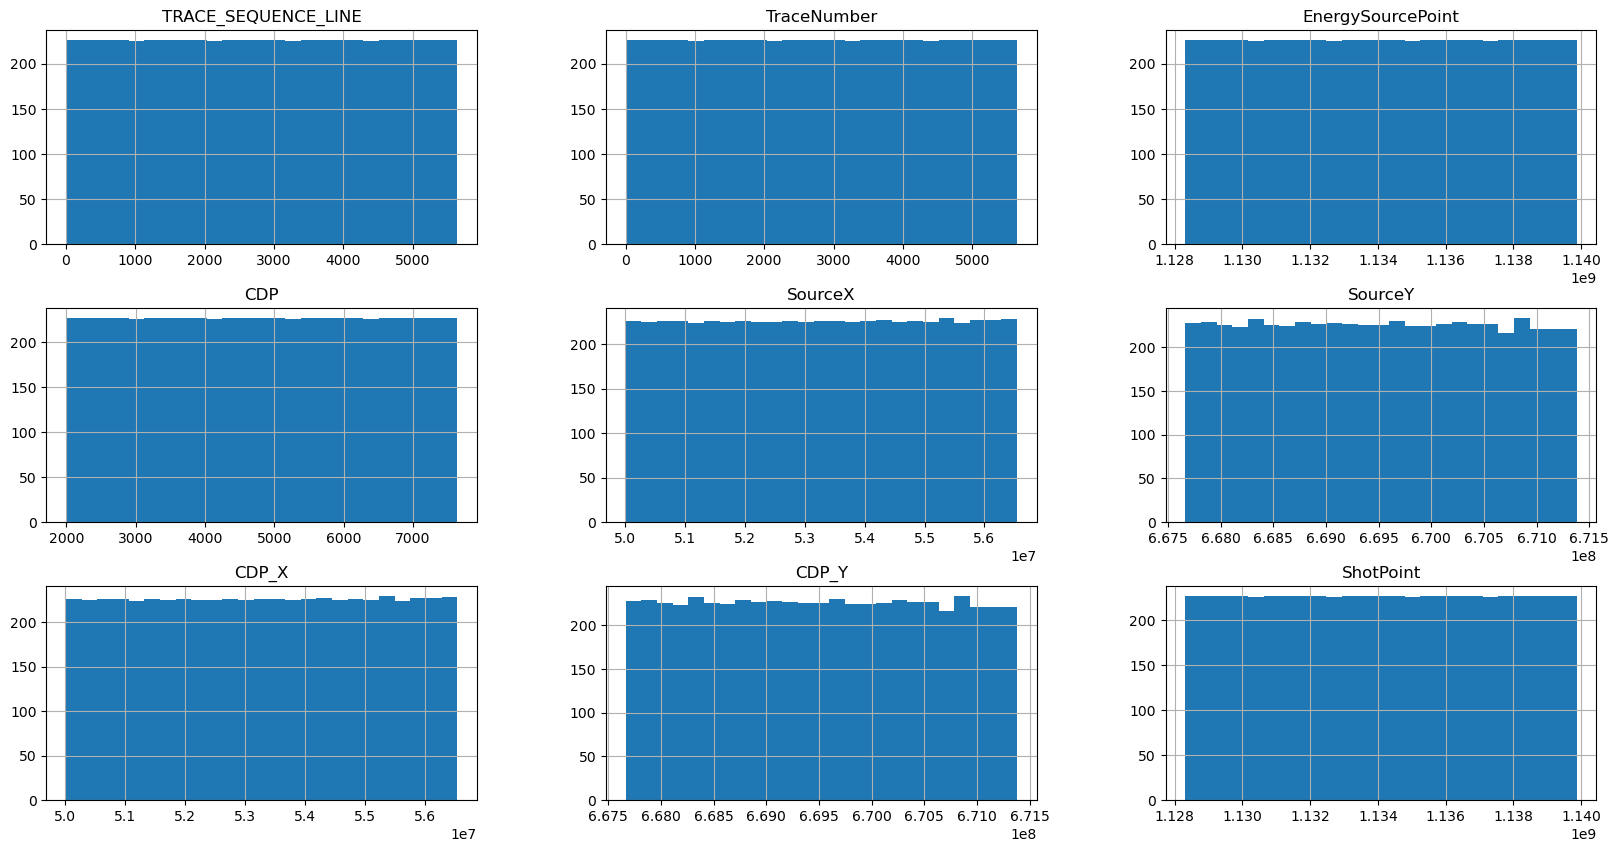

In [91]:
plot = scrape.hist(bins=25, figsize=(20, 10))

In [92]:
V2D = segy_loader(path, cdpx=181, cdpy=185, vert_domain="TWT")

100%|██████████| 5.65k/5.65k [00:00<00:00, 18.3k traces/s]


Loading as 2D


Converting SEGY: 100%|██████████| 5.65k/5.65k [00:01<00:00, 5.63k traces/s]


Text(0.5, 0, 'CDP')

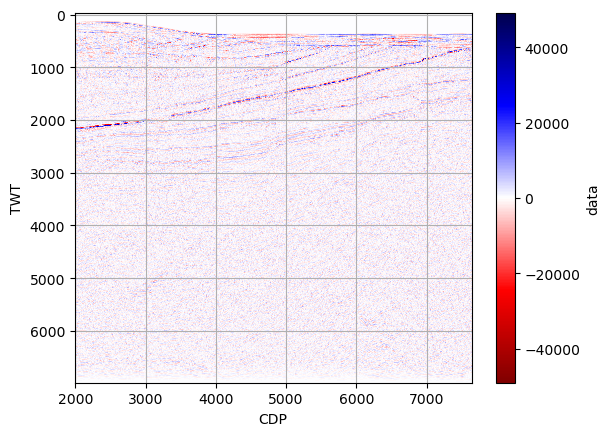

In [93]:
V2D.data.transpose("twt", "cdp", transpose_coords=True).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("CDP")



In [120]:
V2D

<xarray.Dataset>
Dimensions:  (cdp: 5646, twt: 1753)
Coordinates:
  * cdp      (cdp) uint16 1993 1994 1995 1996 1997 ... 7634 7635 7636 7637 7638
  * twt      (twt) float64 -25.0 -21.0 -17.0 ... 6.975e+03 6.979e+03 6.983e+03
    cdp_x    (cdp) float32 5.001e+05 5.001e+05 5.001e+05 ... 5.654e+05 5.655e+05
    cdp_y    (cdp) float32 6.677e+06 6.677e+06 6.677e+06 ... 6.714e+06 6.714e+06
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2020.5 Friday, February ...
    measurement_system:  m
    source_file:         BPN88-09A
    percentiles:         [-10578.037054482156, -8820.35187374168, -2702.48388...
    coord_scalar:        -100.0

In [94]:
V2D_df = V2D.to_dataframe()
V2D_reindex = V2D_df.reset_index()
V2D_reindex = V2D_reindex[V2D_reindex['twt'] <= 3000]
V2D_reindex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4274022 entries, 0 to 9896441
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   cdp     uint16 
 1   twt     float64
 2   data    float32
 3   cdp_x   float32
 4   cdp_y   float32
dtypes: float32(3), float64(1), uint16(1)
memory usage: 122.3 MB


In [95]:
V2D_df

data     cdp_x      cdp_y
cdp  twt                               
1993 -25.0     0.0  500077.0  6676640.0
     -21.0     0.0  500077.0  6676640.0
     -17.0     0.0  500077.0  6676640.0
     -13.0     0.0  500077.0  6676640.0
     -9.0      0.0  500077.0  6676640.0
...            ...       ...        ...
7638  6967.0   0.0  565460.0  6713804.0
      6971.0   0.0  565460.0  6713804.0
      6975.0   0.0  565460.0  6713804.0
      6979.0   0.0  565460.0  6713804.0
      6983.0   0.0  565460.0  6713804.0

[9897438 rows x 3 columns]

In [96]:
V2D_reindex

cdp     twt         data     cdp_x      cdp_y
0        1993   -25.0     0.000000  500077.0  6676640.0
1        1993   -21.0     0.000000  500077.0  6676640.0
2        1993   -17.0     0.000000  500077.0  6676640.0
3        1993   -13.0     0.000000  500077.0  6676640.0
4        1993    -9.0     0.000000  500077.0  6676640.0
...       ...     ...          ...       ...        ...
9896437  7638  2983.0  1930.345581  565460.0  6713804.0
9896438  7638  2987.0  1930.345581  565460.0  6713804.0
9896439  7638  2991.0  1158.207397  565460.0  6713804.0
9896440  7638  2995.0     0.000000  565460.0  6713804.0
9896441  7638  2999.0 -1158.207397  565460.0  6713804.0

[4274022 rows x 5 columns]

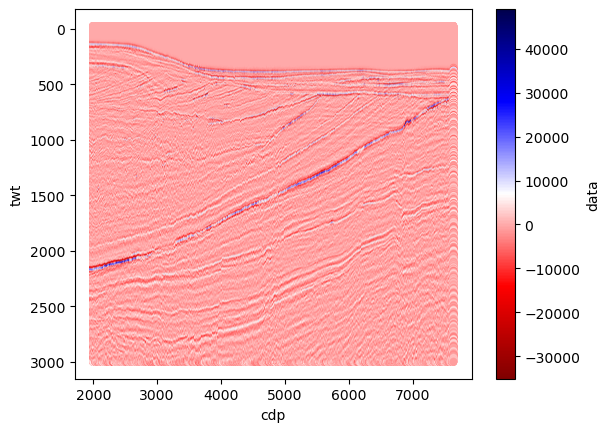

In [29]:
ax = V2D_reindex.plot(x="cdp", y="twt", c="data", kind="scatter", cmap="seismic_r")
ax.invert_yaxis()


In [98]:
signal_column_name = 'data'

# Calculate instantaneous phase
instantaneous_phase = calculate_instantaneous_phase(V2D_reindex, signal_column_name)


In [99]:
V2D_reindex['Instantaneous_Phase'] = instantaneous_phase


In [100]:
V2D_reindex.describe()

cdp           twt          data         cdp_x        cdp_y  \
count  4.274022e+06  4.274022e+06  4.274022e+06  4.274022e+06  4274022.000   
mean   4.815500e+03  1.487000e+03 -3.459969e+00  5.328074e+05  6695162.000   
std    1.629860e+03  8.741076e+02  3.025627e+03  2.186783e+04   272073.625   
min    1.993000e+03 -2.500000e+01 -3.513229e+04  5.000770e+05  6676640.000   
25%    3.404000e+03  7.310000e+02 -1.544276e+03  5.164451e+05  6685881.000   
50%    4.815500e+03  1.487000e+03  0.000000e+00  5.328186e+05  6695148.000   
75%    6.227000e+03  2.243000e+03  1.544276e+03  5.491544e+05  6704450.500   
max    7.638000e+03  2.999000e+03  4.903078e+04  5.654600e+05  6713804.000   

       Instantaneous_Phase  
count         1.845774e+06  
mean          8.634944e-02  
std           1.791400e+00  
min          -3.141592e+00  
25%          -1.570795e+00  
50%           1.911912e-01  
75%           1.570798e+00  
max           3.141591e+00

In [35]:

# Calculate energy envelope
energy_envelope = calculate_energy_envelope(V2D_reindex, signal_column_name)


In [101]:
V2D_reindex['energy_envelope'] = energy_envelope

In [102]:
V2D_reindex.describe()

cdp           twt          data         cdp_x        cdp_y  \
count  4.274022e+06  4.274022e+06  4.274022e+06  4.274022e+06  4274022.000   
mean   4.815500e+03  1.487000e+03 -3.459969e+00  5.328074e+05  6695162.000   
std    1.629860e+03  8.741076e+02  3.025627e+03  2.186783e+04   272073.625   
min    1.993000e+03 -2.500000e+01 -3.513229e+04  5.000770e+05  6676640.000   
25%    3.404000e+03  7.310000e+02 -1.544276e+03  5.164451e+05  6685881.000   
50%    4.815500e+03  1.487000e+03  0.000000e+00  5.328186e+05  6695148.000   
75%    6.227000e+03  2.243000e+03  1.544276e+03  5.491544e+05  6704450.500   
max    7.638000e+03  2.999000e+03  4.903078e+04  5.654600e+05  6713804.000   

       Instantaneous_Phase  energy_envelope  
count         1.845774e+06     1.845774e+06  
mean          8.634944e-02     1.978832e+03  
std           1.791400e+00     1.125756e+03  
min          -3.141592e+00     0.000000e+00  
25%          -1.570795e+00     1.374033e+03  
50%           1.911912e-01     1.831636e+03  
75%           1.570798e+00     2.473666e+03  
max           3.141591e+00     1.102282e+04

In [105]:
semblance = calculate_semblance(V2D_reindex)


In [106]:
V2D_reindex['semblance'] = semblance


In [107]:
result_df = V2D_reindex.pivot(index='twt', columns='cdp', values='data')
result_df

cdp             1993         1994         1995         1996         1997  \
twt                                                                        
-25.0       0.000000     0.000000     0.000000     0.000000     0.000000   
-21.0       0.000000     0.000000     0.000000     0.000000     0.000000   
-17.0       0.000000     0.000000     0.000000     0.000000     0.000000   
-13.0       0.000000     0.000000     0.000000     0.000000     0.000000   
-9.0        0.000000     0.000000     0.000000     0.000000     0.000000   
...              ...          ...          ...          ...          ...   
 2983.0  3860.691162  3860.691162  4246.760254  4246.760254  3860.691162   
 2987.0  5018.898438  4632.829590  3860.691162  3088.552979  2316.414795   
 2991.0  4246.760254  3474.622070  2702.483887  1158.207397   386.069122   
 2995.0  2316.414795  1930.345581  1158.207397   386.069122  -386.069122   
 2999.0     0.000000   386.069122   386.069122     0.000000   386.069122   

cdp             1998         1999         2000         2001         2002  ...  \
twt                                                                       ...   
-25.0       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
-21.0       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
-17.0       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
-13.0       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
-9.0        0.000000     0.000000     0.000000     0.000000     0.000000  ...   
...              ...          ...          ...          ...          ...  ...   
 2983.0  3860.691162  3474.622070  3474.622070  3860.691162  3860.691162  ...   
 2987.0  2316.414795  2702.483887  3088.552979  4246.760254  4632.829590  ...   
 2991.0   386.069122  1544.276489  2702.483887  3860.691162  4246.760254  ...   
 2995.0   386.069122  1544.276489  2702.483887  3474.622070  3860.691162  ...   
 2999.0  1544.276489  2316.414795  2702.483887  3088.552979  2702.483887  ...   

cdp             7629         7630         7631         7632         7633  \
twt                                                                        
-25.0       0.000000     0.000000     0.000000     0.000000     0.000000   
-21.0       0.000000     0.000000     0.000000     0.000000     0.000000   
-17.0       0.000000     0.000000     0.000000     0.000000     0.000000   
-13.0       0.000000     0.000000     0.000000     0.000000     0.000000   
-9.0        0.000000     0.000000     0.000000     0.000000     0.000000   
...              ...          ...          ...          ...          ...   
 2983.0 -1158.207397 -1158.207397 -1158.207397 -1158.207397  -386.069122   
 2987.0 -1544.276489 -1158.207397 -1158.207397  -772.138245     0.000000   
 2991.0 -1158.207397  -386.069122  -386.069122     0.000000  1158.207397   
 2995.0  -386.069122     0.000000     0.000000   772.138245  2316.414795   
 2999.0  -772.138245  -386.069122     0.000000  1544.276489  2702.483887   

cdp             7634         7635         7636         7637         7638  
twt                                                                       
-25.0       0.000000     0.000000     0.000000     0.000000     0.000000  
-21.0       0.000000     0.000000     0.000000     0.000000     0.000000  
-17.0       0.000000     0.000000     0.000000     0.000000     0.000000  
-13.0       0.000000     0.000000     0.000000     0.000000     0.000000  
-9.0        0.000000     0.000000     0.000000     0.000000     0.000000  
...              ...          ...          ...          ...          ...  
 2983.0     0.000000     0.000000   386.069122  1158.207397  1930.345581  
 2987.0   772.138245  1158.207397  1544.276489  1930.345581  1930.345581  
 2991.0  2316.414795  2702.483887  2316.414795  1930.345581  1158.207397  
 2995.0  3474.622070  2702.483887  1544.276489   772.138245     0.000000  
 2999.0  2702.483887  1158.207397     0.000000  -772.138245 -1158.20

In [113]:
result_df = V2D_reindex.pivot(index='twt', columns='cdp', values='Instantaneous_Phase')
result_df.iloc[:, :15]

cdp          1993      1994      1995      1996      1997      1998      1999  \
twt                                                                             
-25.0   -1.570794 -0.889293 -1.570793  2.093639 -0.186508 -0.448835 -0.624893   
-21.0    1.570798 -0.538108 -1.045815  2.819777  1.044523  0.256146  0.093464   
-17.0    1.570793 -0.411684 -0.273991 -2.821095  2.239529  0.936586  0.648445   
-13.0    1.570799  0.226191  0.493188 -2.098629 -2.929824  1.570796  1.160352   
-9.0     1.570795  1.259008  1.227899 -1.246684 -1.901272  2.246103  1.798344   
...           ...       ...       ...       ...       ...       ...       ...   
 2983.0 -0.705949  2.617415  0.789440 -0.973926  0.277613  2.354249 -2.305747   
 2987.0 -0.141979  3.138891  1.236173 -0.386948  1.415202  3.071621 -1.991042   
 2991.0  0.373178 -2.690631  1.952409  0.212370  2.541052 -2.496896 -1.748585   
 2995.0  0.944626 -2.170747  2.560948  0.910835 -2.628763 -1.772932 -1.235416   
 2999.0  1.570797 -1.570797 -2.867601  1.570796 -1.481797 -0.974909 -0.823493   

cdp          2000      2001      2002      2003      2004      2005      2006  \
twt                                                                             
-25.0   -1.218478  2.279878  2.290424 -1.083085  2.301749 -2.668424 -1.026429   
-21.0   -0.266682  2.972861  2.732814 -0.747658  3.072580 -2.183043  0.034073   
-17.0    0.802479 -2.598081 -3.117026 -1.193982 -2.416190 -1.735778  0.981160   
-13.0    2.551912 -1.908834 -2.582828 -0.308045 -1.570796 -1.370167  1.900230   
-9.0    -1.231563 -1.570797 -1.962672  0.764783 -0.692797 -1.069698  2.785603   
...           ...       ...       ...       ...       ...       ...       ...   
 2983.0  0.716498 -0.381906  0.655479  1.570796 -1.998403  1.415480 -1.893541   
 2987.0  1.625014  0.123860  0.968723  1.570796 -1.009143  1.894596 -1.091103   
 2991.0  2.513222  0.528610  1.336463  2.400906  0.064092  2.261209 -0.227799   
 2995.0 -2.892238  0.995565  1.696522 -2.918301  1.244253  2.664376  0.592546   
 2999.0 -1.972180  1.620656  1.992726 -1.939686  2.334343  3.109796  1.097791   

cdp          2007  
twt                
-25.0   -3.072913  
-21.0   -2.346299  
-17.0   -2.075357  
-13.0   -1.234003  
-9.0    -0.120447  
...           ...  
 2983.0 -1.870019  
 2987.0 -0.507117  
 2991.0  0.609916  
 2995.0  1.659330  
 2999.0  2.701371  

[757 rows x 15 columns]

In [116]:
result_df = V2D_reindex.pivot(index='twt', columns='cdp', values='energy_envelope')
result_df.iloc[:, :15]

cdp             1993         1994         1995         1996         1997  \
twt                                                                        
-25.0       0.000000  1435.410274  1532.797507  1493.415557  2446.509559   
-21.0       0.000000  1436.132646  1540.663170  1487.754096  2443.794139   
-17.0       0.000000  1440.691501  1551.751858  1479.574443  2440.348464   
-13.0       0.000000  1448.954057  1565.401613  1469.797109  2435.739790   
-9.0        0.000000  1461.155321  1581.275399  1458.941598  2429.553715   
...              ...          ...          ...          ...          ...   
 2983.0  1138.674228  1347.902244  1599.946006  1263.415482  2832.583571   
 2987.0  1105.493932  1341.454363  1585.038254  1258.249186  2821.151856   
 2991.0  1066.386679  1339.301045  1573.262560  1252.235795  2805.717685   
 2995.0  1021.908326  1341.293593  1565.230832  1245.165718  2786.950665   
 2999.0   972.699440  1346.609074  1560.826192  1237.272224  2765.268531   

cdp             1998         1999         2000         2001         2002  \
twt                                                                        
-25.0    2141.340883  1178.938836  2382.921403  2472.134558  2053.668717   
-21.0    2173.880686  1149.484362  2392.816019  2478.411926  2032.404893   
-17.0    2205.684952  1124.064120  2403.210532  2479.272887  2015.498304   
-13.0    2236.373878  1102.896348  2413.453932  2475.190946  2001.510784   
-9.0     2265.341711  1085.462477  2423.262903  2466.534906  1989.323447   
...              ...          ...          ...          ...          ...   
 2983.0  1857.445512  1496.614214  2376.653837  2250.293596  1966.039006   
 2987.0  1866.420754  1462.829962  2411.385965  2302.943434  1903.496999   
 2991.0  1879.813711  1430.512826  2443.524402  2349.108328  1848.989086   
 2995.0  1897.352284  1399.807156  2472.196994  2388.547313  1801.183015   
 2999.0  1918.090140  1370.770999  2497.499525  2421.856121  1760.223863   

cdp             2003         2004         2005         2006         2007  
twt                                                                       
-25.0    2328.592127  1417.368945  2803.707253  2526.246637  1665.808129  
-21.0    2386.079830  1399.756377  2841.292342  2566.540476  1640.136063  
-17.0    2441.129394  1382.231104  2876.566567  2599.845412  1616.179161  
-13.0    2493.907705  1364.825966  2908.851861  2625.331780  1594.010811  
-9.0     2544.739243  1347.571913  2937.578181  2642.171446  1574.224161  
...              ...          ...          ...          ...          ...  
 2983.0  1952.787811  1582.014364  2486.562723  2203.723544  1826.300504  
 2987.0  2022.480485  1557.117189  2531.710452  2258.426504  1797.695875  
 2991.0  2092.120501  1530.556259  2578.090129  2314.348401  1769.661077  
 2995.0  2160.974908  1503.298424  2624.848548  2370.485541  1742.272923  
 2999.0  2228.931996  1476.260640  2671.309188  2424.795785  1715.902454  

[757 rows x 15 columns]

In [136]:
import segyio
import pandas as pd
import numpy as np
from scipy.signal import hilbert
from scipy.signal.windows import hann


In [137]:

# Wczytaj dane SEG-Y
filename = 'BPN88-09A'
with segyio.open(filename, 'r',ignore_geometry=True) as segyfile:
    data = segyfile.trace.raw[:]
    twt = segyfile.samples
    cdp = segyfile.header[segyio.TraceField.CDP]



In [138]:
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)
    # Load headers
    bin_headers = f.bin
    #text_headers = parse_text_header(f)
    #trace_headers = parse_trace_headers(f, n_traces)
f'N Traces: {n_traces}, N Samples: {n_samples}, Sample rate: {sample_rate}ms'


'N Traces: 5646, N Samples: 1753, Sample rate: 4.0ms'

In [139]:

clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 6177; the max amplitude is 49031'

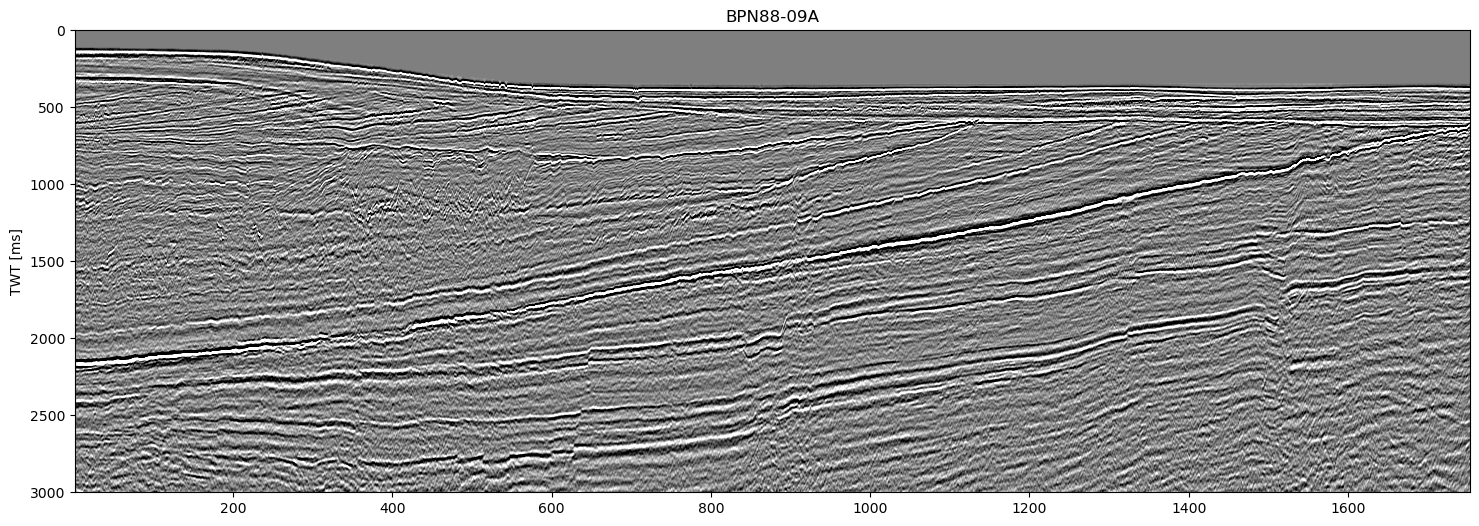

In [155]:
n_traces = data.shape[1]
vm = 5000

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 6))

# Define the extent
extent = [1, n_traces, twt[-1], twt[0]]

# Plot the seismic data as an image
ax.imshow(data.T, cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)

# Set axis labels and limits
#ax.set_xlabel('CDP')
ax.set_ylim(3000, 0)
ax.set_ylabel('TWT [ms]')
ax.set_title(filename)
plt.show()

# Importing 3D SEG-Y lines

In [175]:
from segysak.segy import segy_header_scan

# default just needs the file name
scan = segy_header_scan("TNE01_Full_3D.sgy")
scan

100%|██████████| 1.00k/1.00k [00:00<00:00, 10.8k traces/s]


byte_loc   count   mean         std    min  \
TRACE_SEQUENCE_LINE                   1  1000.0  500.5  288.819436    1.0   
TRACE_SEQUENCE_FILE                   5  1000.0  362.0    0.000000  362.0   
FieldRecord                           9  1000.0  362.0    0.000000  362.0   
TraceNumber                          13  1000.0  500.5  288.819436    1.0   
EnergySourcePoint                    17  1000.0    0.0    0.000000    0.0   
...                                 ...     ...    ...         ...    ...   
SourceEnergyDirectionMantissa       219  1000.0    0.0    0.000000    0.0   
SourceEnergyDirectionExponent       223  1000.0    0.0    0.000000    0.0   
SourceMeasurementMantissa           225  1000.0    0.0    0.000000    0.0   
SourceMeasurementExponent           229  1000.0    0.0    0.000000    0.0   
SourceMeasurementUnit               231  1000.0    0.0    0.000000    0.0   

                                  25%    50%     75%     max  
TRACE_SEQUENCE_LINE            250.75  500.5  750.25  1000.0  
TRACE_SEQUENCE_FILE            362.00  362.0  362.00   362.0  
FieldRecord                    362.00  362.0  362.00   362.0  
TraceNumber                    250.75  500.5  750.25  1000.0  
EnergySourcePoint                0.00    0.0    0.00     0.0  
...                               ...    ...     ...     ...  
SourceEnergyDirectionMantissa    0.00    0.0    0.00     0.0  
SourceEnergyDirectionExponent    0.00    0.0    0.00     0.0  
SourceMeasurementMantissa        0.00    0.0    0.00     0.0  
SourceMeasurementExponent        0.00    0.0    0.00     0.0  
SourceMeasurementUnit            0.00    0.0    0.00     0.0  

[89 rows x 9 columns]

In [176]:
scan[scan["std"] > 0]

byte_loc   count          mean           std         min  \
TRACE_SEQUENCE_LINE         1  1000.0  5.005000e+02    288.819436         1.0   
TraceNumber                13  1000.0  5.005000e+02    288.819436         1.0   
CDP                        21  1000.0  1.907000e+03    577.638872       908.0   
SourceX                    73  1000.0  5.570523e+06  36537.740701   5507333.0   
SourceY                    77  1000.0  6.749913e+07  62278.028634  67391426.0   
CDP_X                     181  1000.0  5.570523e+06  36537.740701   5507333.0   
CDP_Y                     185  1000.0  6.749913e+07  62278.028634  67391426.0   
CROSSLINE_3D              193  1000.0  1.907000e+03    577.638872       908.0   

                             25%         50%          75%         max  
TRACE_SEQUENCE_LINE       250.75       500.5       750.25      1000.0  
TraceNumber               250.75       500.5       750.25      1000.0  
CDP                      1407.50      1907.0      2406.50      2906.0  
SourceX               5538928.25   5570523.5   5602118.50   5633714.0  
SourceY              67445279.25  67499133.0  67552986.00  67606840.0  
CDP_X                 5538928.25   5570523.5   5602118.50   5633714.0  
CDP_Y                67445279.25  67499133.0  67552986.00  67606840.0  
CROSSLINE_3D             1407.50      1907.0      2406.50      2906.0

In [177]:
scrape = segy_header_scrape("TNE01_Full_3D.sgy", partial_scan=5000)
#scrape = scrape[scan[scan["std"] > 0].index]
scrape

100%|██████████| 5.00k/5.00k [00:00<00:00, 12.1k traces/s]


TRACE_SEQUENCE_LINE  TRACE_SEQUENCE_FILE  FieldRecord  TraceNumber  \
0                       1                  362          362            1   
1                       2                  362          362            2   
2                       3                  362          362            3   
3                       4                  362          362            4   
4                       5                  362          362            5   
...                   ...                  ...          ...          ...   
4995                  535                  368          368          535   
4996                  536                  368          368          536   
4997                  537                  368          368          537   
4998                  538                  368          368          538   
4999                  539                  368          368          539   

      EnergySourcePoint   CDP  CDP_TRACE  TraceIdentificationCode  \
0                     0   908          1                        1   
1                     0   910          1                        1   
2                     0   912          1                        1   
3                     0   914          1                        1   
4                     0   916          1                        1   
...                 ...   ...        ...                      ...   
4995                  0  1976          1                        1   
4996                  0  1978          1                        1   
4997                  0  1980          1                        1   
4998                  0  1982          1                        1   
4999                  0  1984          1                        1   

      NSummedTraces  NStackedTraces  ...  TransductionConstantPower  \
0                 0               0  ...                          0   
1                 0               0  ...                          0   
2                 0               0  ...                          0   
3                 0               0  ...                          0   
4                 0               0  ...                          0   
...             ...             ...  ...                        ...   
4995              0               0  ...                          0   
4996              0               0  ...                          0   
4997              0               0  ...                          0   
4998              0               0  ...                          0   
4999              0               0  ...                          0   

      TransductionUnit  TraceIdentifier  ScalarTraceHeader  SourceType  \
0                    0                0                  0           0   
1                    0                0                  0           0   
2                    0                0                  0           0   
3                    0                0                  0           0   
4                    0                0                  0           0   
...                ...              ...                ...         ...   
4995                 0                0                  0           0   
4996                 0                0                  0           0   
4997                 0                0                  0           0   
4998                 0                0                  0           0   
4999                 0                0                  0           0   

      SourceEnergyDirectionMantissa  SourceEnergyDirectionExponent  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
4995                            

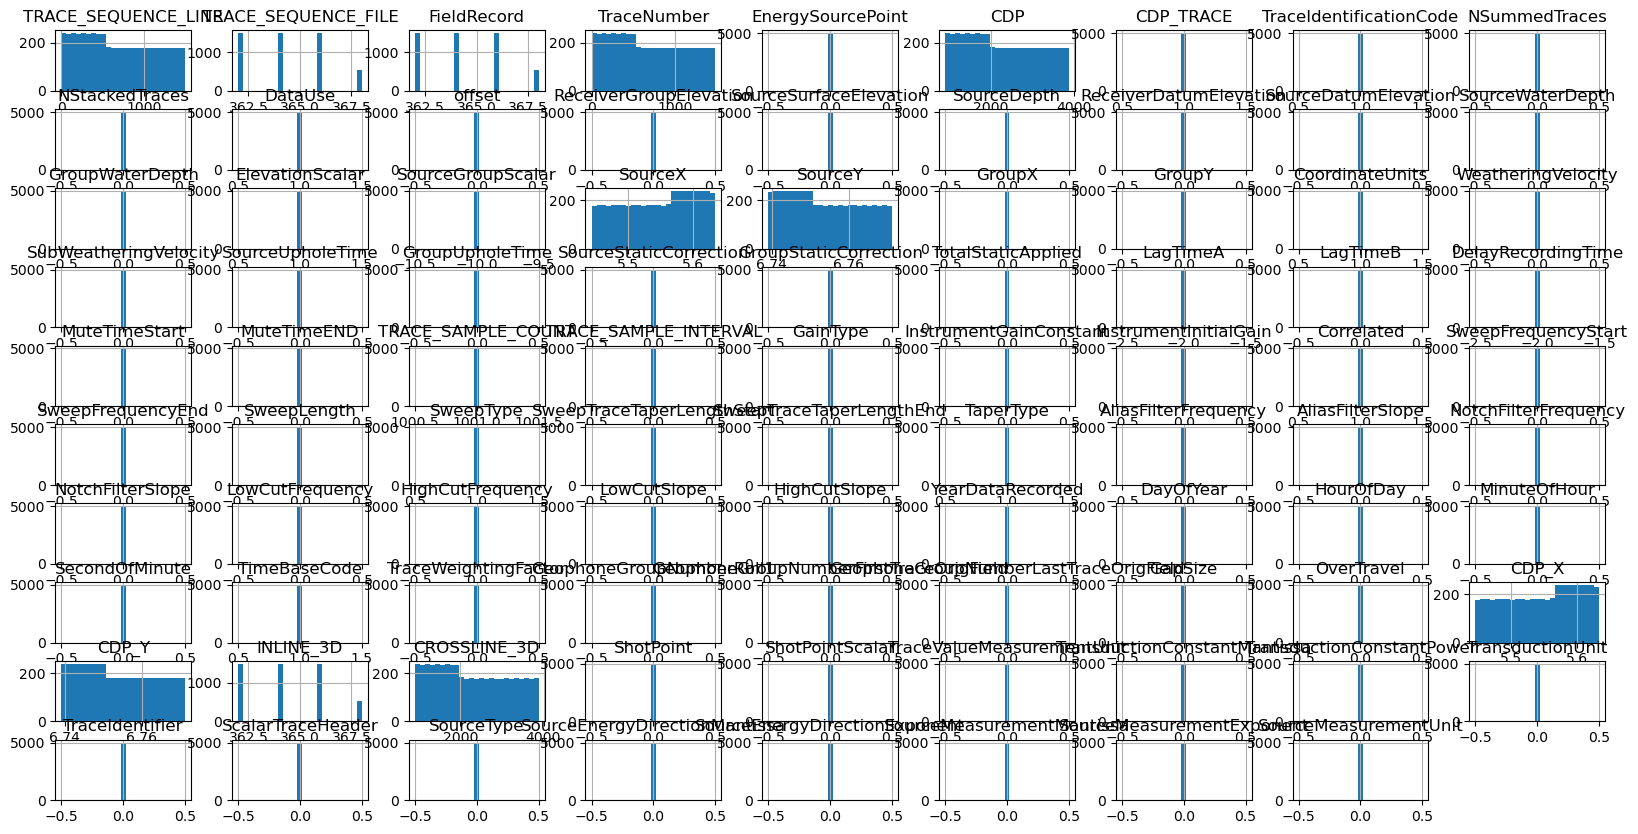

In [178]:
plot = scrape.hist(bins=25, figsize=(20, 10))

In [183]:
from segysak.segy import get_segy_texthead

get_segy_texthead("TNE01_Full_3D.sgy")

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2019.4 Wednesday, October 21 2020 14:19:53
C 2 Name: TNE01_FULL ÝRealized¨ 1 Type: 3D seismic
C 3
C 4 First inline: 362    Last inline: 1540
C 5 First xline:  908    Last xline:  3880
C 6 CRS: ST_ED50_UTM31N_P23031_T1133 ÝStatoil,2100005¨
C 7 X min: 531854.62 max: 563388.48 delta: 31533.86
C 8 Y min: 6731674.15 max: 6771202.25 delta: 39528.10
C 9 Time min: -4000.00 max: 4.00 delta: 4004.00
C10 Lat min: 60.42'51.1341"N max: 61.04'22.1371"N delta: 0.21'31.0031"
C11 Long min: 3.35'1.5768"E max: 4.10'28.3122"E delta: 0.35'26.7354"
C12 Trace min: -3998.00 max: 2.00 delta: 4000.00
C13 Seismic (template) min: -304.74 max: 302.36 delta: 607.11
C14 Amplitude (data) min: -304.74 max: 302.36 delta: 607.11
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 10.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

In [184]:
from segysak.segy import segy_loader, well_known_byte_locs

V3D = segy_loader("TNE01_Full_3D.sgy", iline=5, xline=21, cdpx=73, cdpy=77, vert_domain="TWT")
V3D

100%|██████████| 877k/877k [00:55<00:00, 15.9k traces/s]


Loading as 3D
Fast direction is TRACE_SEQUENCE_FILE


Converting SEGY: 100%|██████████| 877k/877k [03:10<00:00, 4.61k traces/s]   


<xarray.Dataset>
Dimensions:  (iline: 590, xline: 1487, twt: 1001)
Coordinates:
  * iline    (iline) uint16 362 364 366 368 370 372 ... 1532 1534 1536 1538 1540
  * xline    (xline) uint16 908 910 912 914 916 918 ... 3872 3874 3876 3878 3880
  * twt      (twt) float64 -2.0 2.0 6.0 10.0 ... 3.99e+03 3.994e+03 3.998e+03
    cdp_x    (iline, xline) float32 5.634e+05 5.634e+05 ... 5.319e+05 5.319e+05
    cdp_y    (iline, xline) float32 6.739e+06 6.739e+06 ... 6.764e+06 6.764e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2019.4 Wednesday, Octobe...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         TNE01_Full_3D.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-6.62317201331616e-68, -4.41544786148683e-68, -2.20...
    coord_scalar:        -10.0

Text(0.5, 0, 'XLINE')

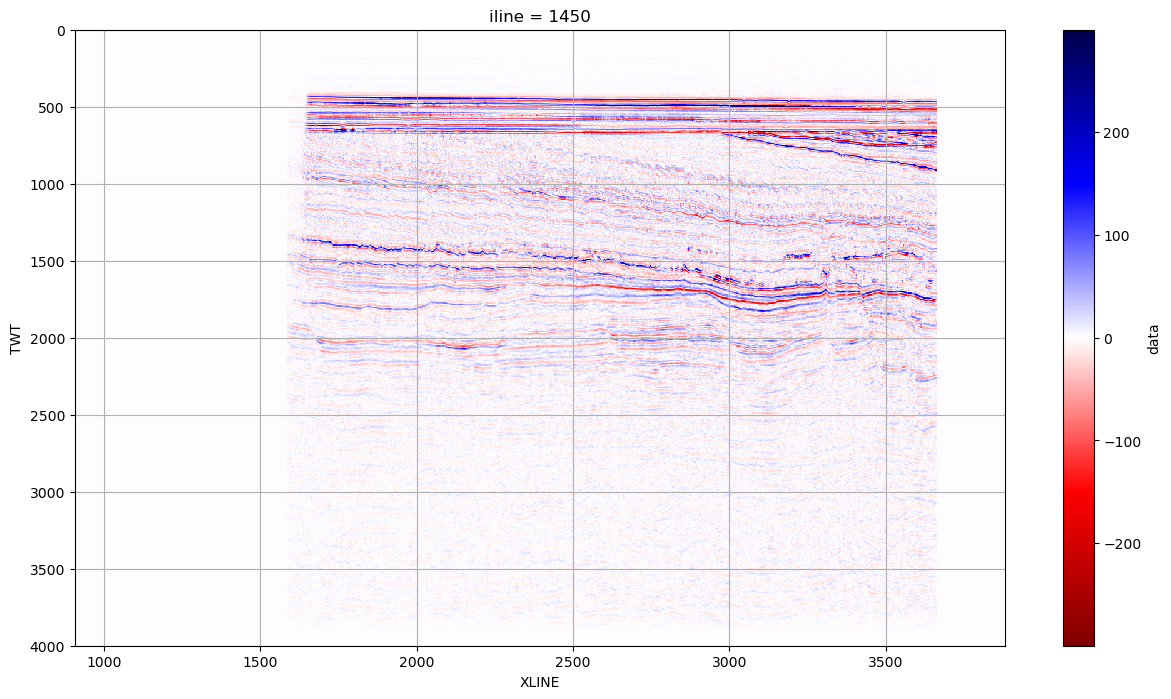

In [185]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 1450
V3D.data.transpose("twt", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")

Text(0.5, 0, 'ILINE')

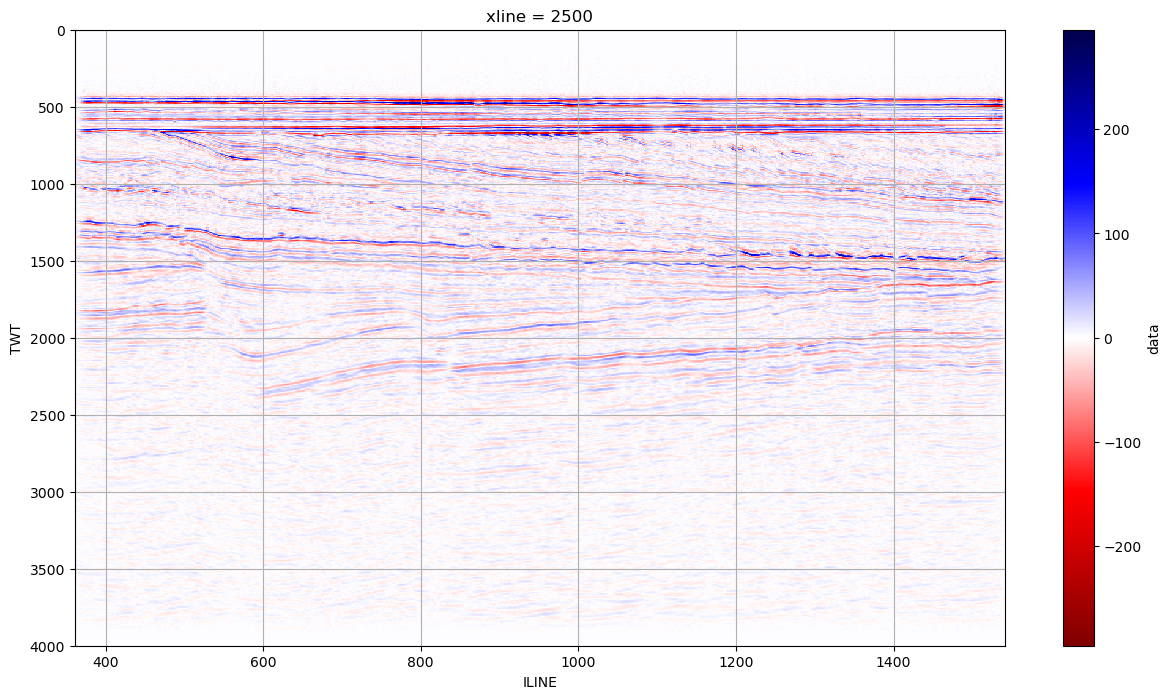

In [190]:
fig2, ax2 = plt.subplots(ncols=1, figsize=(15, 8))
xline_sel = 2500
V3D.data.transpose("twt", "xline", "iline", transpose_coords=True).sel(
    xline=xline_sel
).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("ILINE")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


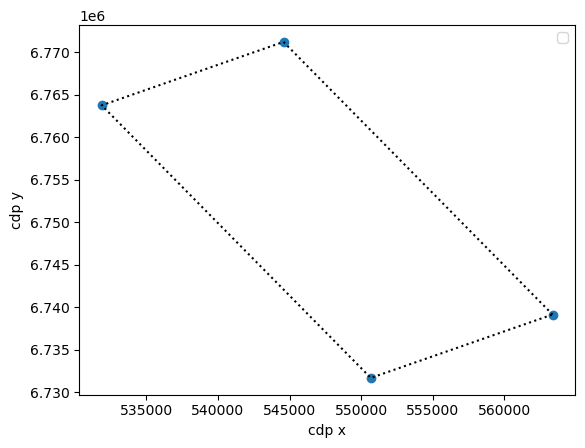

In [197]:
ax = V3D.seis.plot_bounds()
plt.legend()